https://medium.com/@mrconnor/forecasting-the-stock-market-using-lstm-will-it-rise-tomorrow-94ff6b6a34b6

In [351]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [352]:
x = np.arange(0,100,0.5) 
y = np.sin(x)

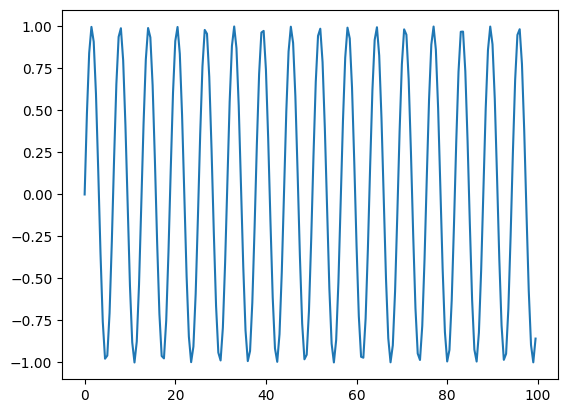

In [353]:
plt.plot(x, y)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [354]:
trainX = np.array(x)
trainY = np.array(y)

In [355]:
trainX = np.reshape(trainX, (1, trainX.shape[0], 1))
trainY = np.reshape(trainY, (1, trainY.shape[0]))
print(trainX.shape)
print(trainY.shape)

(1, 200, 1)
(1, 200)


In [356]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, batch_input_shape=(1, 200, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [357]:
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.8127
Epoch 2/200
1/1 [==============================] - 0s 33ms/step - loss: 0.8099
Epoch 3/200
1/1 [==============================] - 0s 36ms/step - loss: 0.8071
Epoch 4/200
1/1 [==============================] - 0s 39ms/step - loss: 0.8044
Epoch 5/200
1/1 [==============================] - 0s 40ms/step - loss: 0.8016
Epoch 6/200
1/1 [==============================] - 0s 38ms/step - loss: 0.7988
Epoch 7/200
1/1 [==============================] - 0s 34ms/step - loss: 0.7961
Epoch 8/200
1/1 [==============================] - 0s 36ms/step - loss: 0.7934
Epoch 9/200
1/1 [==============================] - 0s 36ms/step - loss: 0.7906
Epoch 10/200
1/1 [==============================] - 0s 36ms/step - loss: 0.7879
Epoch 11/200
1/1 [==============================] - 0s 37ms/step - loss: 0.7853
Epoch 12/200
1/1 [==============================] - 0s 58ms/step - loss: 0.7826
Epoch 13/200
1/1 [==============================] -

In [360]:
print(trainX.shape)
trainPredict = model.predict(trainX)
print(trainPredict.shape)

(1, 200, 1)
1/1 [==============================] - 0s 43ms/step
(1, 1)


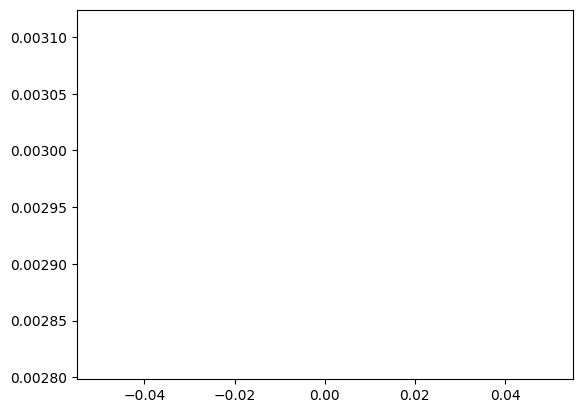

In [359]:
# print(trainPredict[:,0])
plt.plot(trainX[:,0,0], trainPredict[:,0])